# 1. The Plot function

In [1]:
def make_logistic(r, a, b, c):
    def f_logistic(t):
        return a / (b + c * exp(-r * t))
    return f_logistic


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
r = 0.15
a = 20.0
c = 15.0
b1, b2, b3 = 2.0, 3.0, 4.0

logistic1 = make_logistic(r, a, b1, c)
logistic2 = make_logistic(r, a, b2, c)
logistic3 = make_logistic(r, a, b3, c)

### Adding a title, labels, and a legend

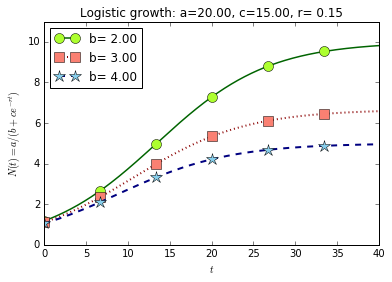

In [19]:
plot(tvalues, logistic1(tvalues), linewidth=1.5, color='DarkGreen', linestyle='-',
marker='o', markevery=50, markerfacecolor='GreenYellow', markersize=10.0)
plot(tvalues, logistic2(tvalues), linewidth=2.0, color='#8B0000', linestyle=':',
marker='s', markevery=50, markerfacecolor='Salmon', markersize=10.0)
plot(tvalues, logistic3(tvalues), linewidth=2.0, color=(0.0, 0.0, 0.5), linestyle='--',
marker = '*', markevery=50, markerfacecolor='SkyBlue', markersize=12.0)
axis([0, tmax, 0, 11.])

title('Logistic growth: a={:5.2f}, c={:5.2f}, r={:5.2f}'.format(a, c, r))
xlabel('$t$')
ylabel('$N(t)=a/(b+ce^{-rt})$')

legend(['b={:5.2f}'.format(b1),
        'b={:5.2f}'.format(b2),
        'b={:5.2f}'.format(b3)], loc='upper left')

None

The plot() function supports plotting several curves in the same function call.

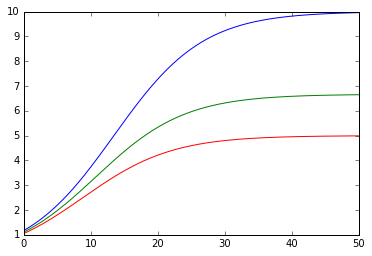

In [7]:
tmax = 50
tvalues = linspace(0, tmax, 300)
plot(tvalues, logistic1(tvalues),
     tvalues, logistic2(tvalues),
     tvalues, logistic3(tvalues))